# Food Waste in University Canteen - Exploratory Data Analysis

## 1. Introduction
This notebook performs an exhaustive exploratory data analysis (EDA) on the cleaned food waste dataset from a university canteen. The dataset contains records of food waste including date, meal type, canteen section, food category, waste weight, unit price, and cost loss. The goal is to uncover patterns, identify key contributors to waste, and derive actionable insights to reduce waste and cost.

## 2. Setup and Data Loading
We'll start by importing necessary libraries and loading the cleaned dataset.

In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [20]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Change to your own directory
try:
    os.chdir("/content/drive/MyDrive/UAB/FDS/campus-waste-intelligence")
    print("Directory changed")
except OSError:
    print("Error: Can't change the Current Working Directory")

Mounted at /content/drive
Directory changed


In [21]:
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

df = pd.read_csv('data/food_waste_cleaned.csv')
df.head()

,Date,Meal,Canteen_Section,Food_Category,Waste_Weight_kg,Unit_Price_per_kg,Cost_Loss,Year,Month,Day,...,Quarter,IsWeekend,Is_Waste_Outlier,Is_Cost_Outlier,Is_High_Waste,Is_High_Cost,Month_Name,Weekday_Type,Waste_per_Price,Log_Waste
0,2025-06-11,Breakfast,B,Vegetables,1.81,3.0,5.430,2025,6,11,...,2,False,False,False,False,False,June,Weekday,0.603333,1.033184
1,2025-06-11,Lunch,B,Soup,3.32,1.5,4.980,2025,6,11,...,2,False,False,False,False,False,June,Weekday,2.213333,1.463255
2,2025-06-11,Dinner,B,Soup,1.27,1.5,1.905,2025,6,11,...,2,False,False,False,False,False,June,Weekday,0.846667,0.819780
3,2025-06-11,Lunch,D,Soup,1.10,1.5,1.650,2025,6,11,...,2,False,False,False,False,False,June,Weekday,0.733333,0.741937
4,2025-06-11,Dinner,D,Meat,4.57,8.0,36.560,2025,6,11,...,2,False,False,True,True,True,June,Weekday,0.571250,1.717395


## 3. Data Overview
Let's examine the shape, data types, and basic statistics of the cleaned dataset.

In [22]:
print("Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nSummary Statistics (numerical):")
df.describe()

Shape: (2600, 23)

Data Types:
Date                  object
Meal                  object
Canteen_Section       object
Food_Category         object
Waste_Weight_kg      float64
Unit_Price_per_kg    float64
Cost_Loss            float64
Year                   int64
Month                  int64
Day                    int64
Weekday               object
Week                   int64
DayOfYear              int64
Quarter                int64
IsWeekend               bool
Is_Waste_Outlier        bool
Is_Cost_Outlier         bool
Is_High_Waste           bool
Is_High_Cost            bool
Month_Name            object
Weekday_Type          object
Waste_per_Price      float64
Log_Waste            float64
dtype: object

Summary Statistics (numerical):


,Waste_Weight_kg,Unit_Price_per_kg,Cost_Loss,Year,Month,Day,Week,DayOfYear,Quarter,Waste_per_Price,Log_Waste
count,2600.000000,2600.000000,2600.000000,2600.0,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000
mean,2.585988,3.634808,9.233142,2025.0,6.824615,15.831154,28.092308,191.729231,2.665000,1.059910,1.184796
std,1.408281,2.585178,8.952415,0.0,0.681200,8.813420,2.522225,17.640257,0.472081,0.831304,0.452717
min,0.100000,1.500000,0.150000,2025.0,6.000000,1.000000,24.000000,162.000000,2.000000,0.012500,0.095310
25%,1.390000,2.000000,3.495000,2025.0,6.000000,8.000000,26.000000,176.000000,2.000000,0.375000,0.871293
50%,2.600000,3.000000,6.360000,2025.0,7.000000,16.000000,28.000000,192.000000,3.000000,0.838333,1.280934
75%,3.800000,8.000000,10.950000,2025.0,7.000000,23.000000,30.000000,207.000000,3.000000,1.600833,1.568616
max,5.000000,8.000000,40.000000,2025.0,8.000000,31.000000,32.000000,222.000000,3.000000,3.326667,1.791759


In [23]:
print("\nSummary Statistics (categorical):")
df.describe(include='object')


Summary Statistics (categorical):


,Date,Meal,Canteen_Section,Food_Category,Weekday,Month_Name,Weekday_Type
count,2600,2600,2600,2600,2600,2600,2600
unique,61,3,4,4,7,3,2
top,2025-06-12,Breakfast,B,Rice,Sunday,July,Weekday
freq,46,869,654,659,392,1314,1831


**Observations:**
- The dataset contains `XXX` rows and `XXX` columns after cleaning.
- Date is now datetime, and we have extracted multiple temporal features.
- No missing values are present.
- Waste weight ranges from about 0.1 kg to 5.0 kg.
- Cost loss ranges from about 0.1 to 40.0.

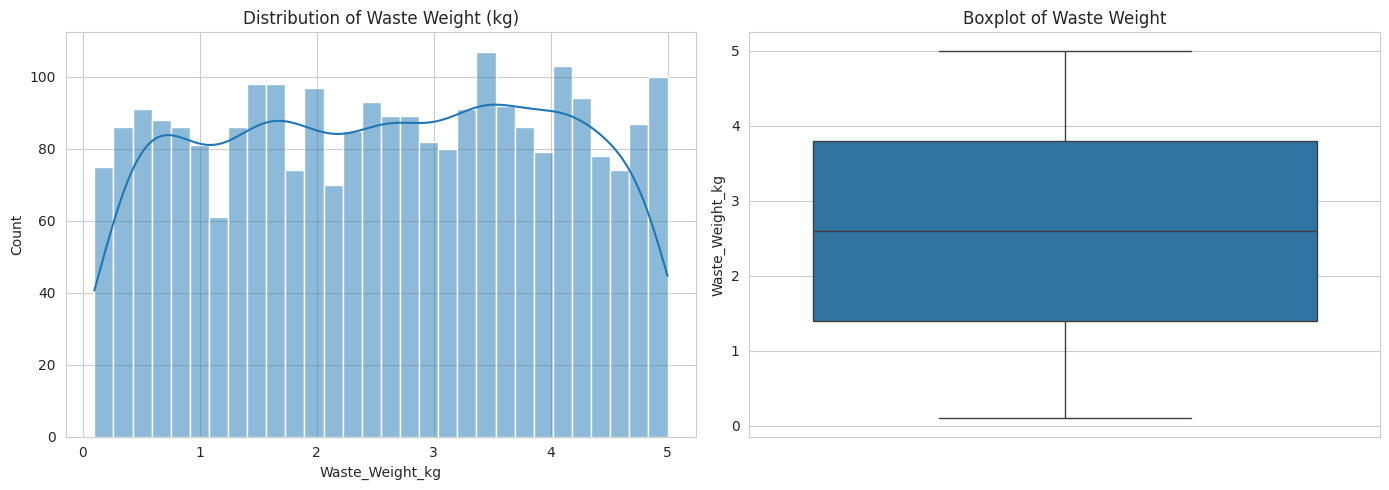

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df['Waste_Weight_kg'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Waste Weight (kg)')
sns.boxplot(y=df['Waste_Weight_kg'], ax=axes[1])
axes[1].set_title('Boxplot of Waste Weight')
plt.tight_layout()
plt.show()

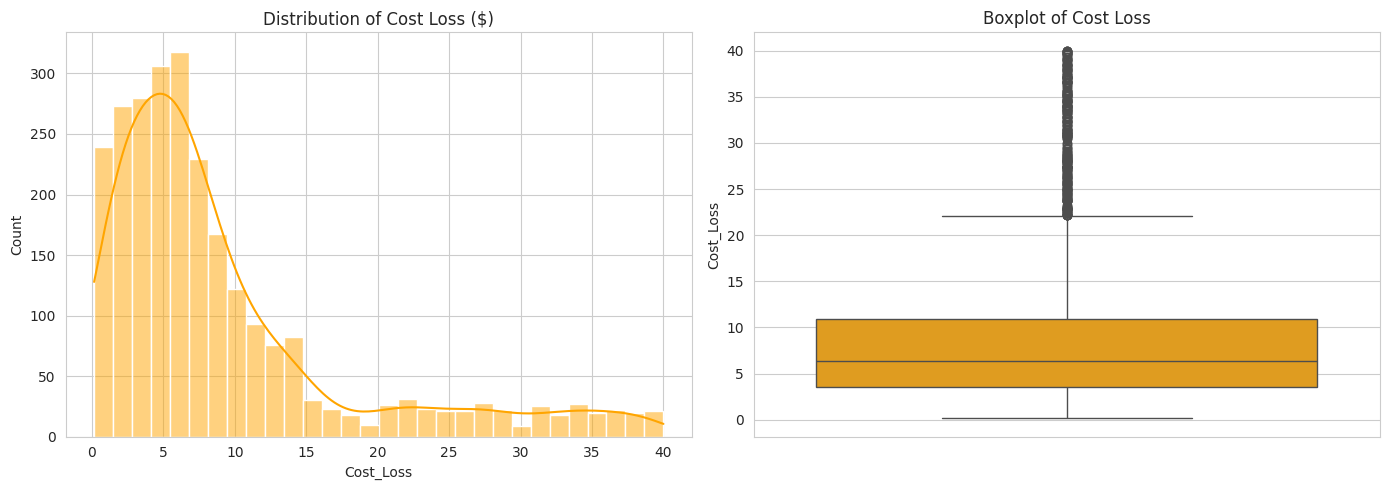

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df['Cost_Loss'], bins=30, kde=True, ax=axes[0], color='orange')
axes[0].set_title('Distribution of Cost Loss ($)')
sns.boxplot(y=df['Cost_Loss'], ax=axes[1], color='orange')
axes[1].set_title('Boxplot of Cost Loss')
plt.tight_layout()
plt.show()

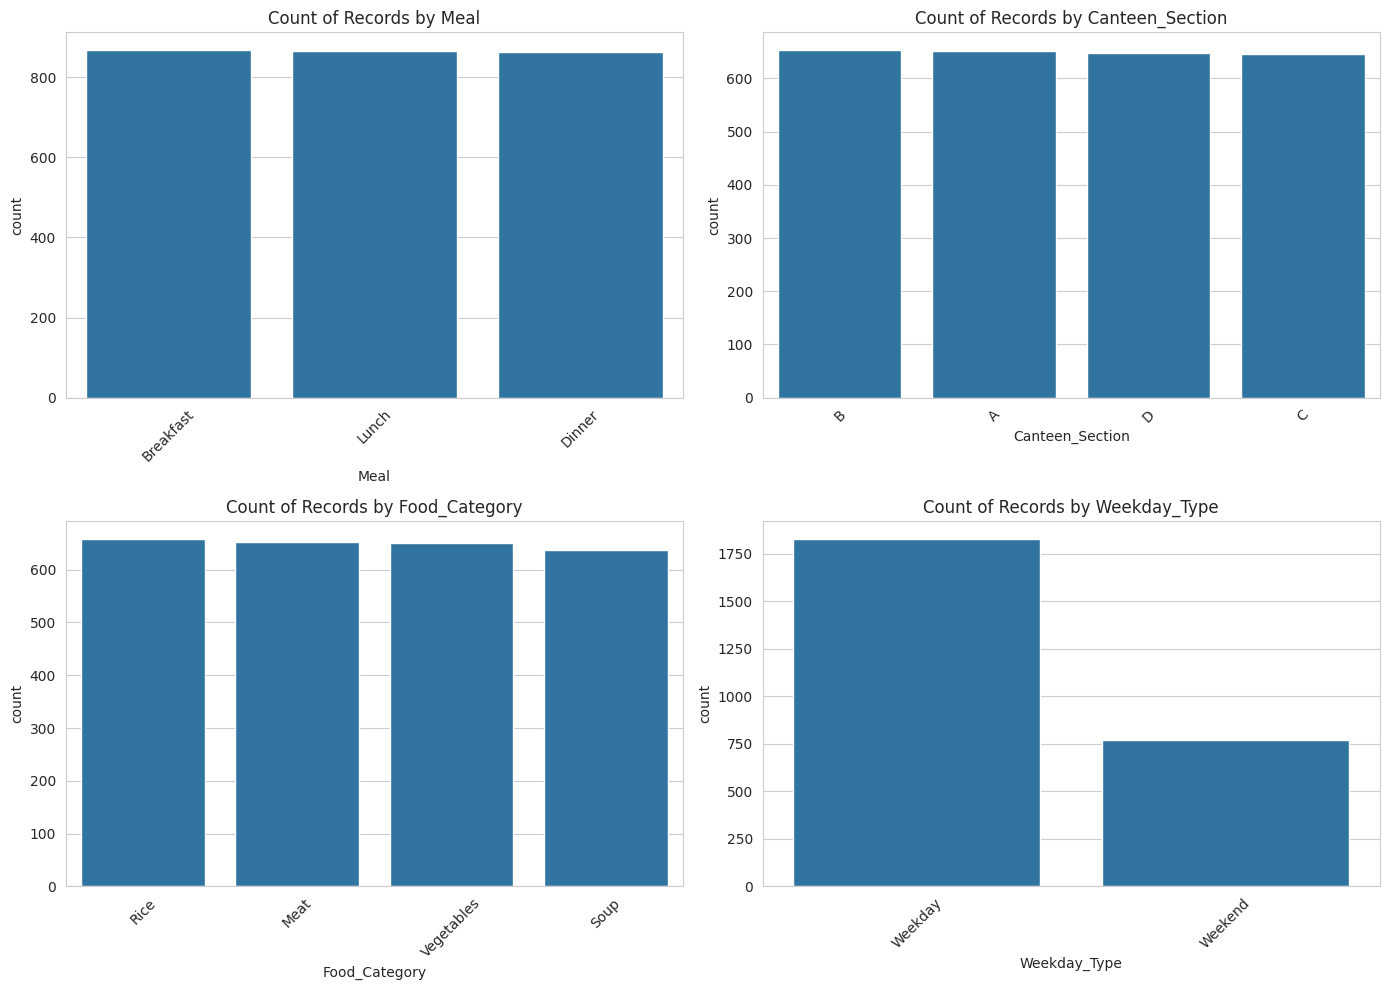

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
cat_plots = ['Meal', 'Canteen_Section', 'Food_Category', 'Weekday_Type']
for i, col in enumerate(cat_plots):
    sns.countplot(data=df, x=col, ax=axes[i//2, i%2], order=df[col].value_counts().index)
    axes[i//2, i%2].set_title(f'Count of Records by {col}')
    axes[i//2, i%2].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

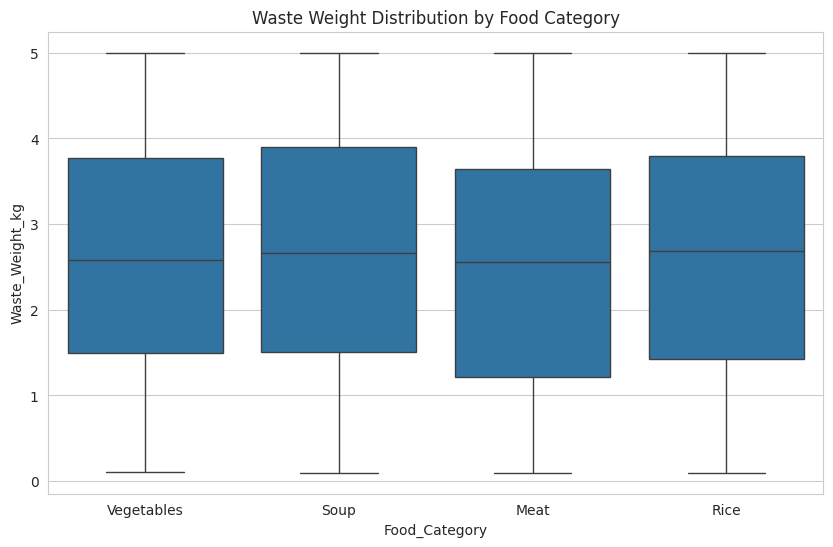

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Food_Category', y='Waste_Weight_kg')
plt.title('Waste Weight Distribution by Food Category')
plt.show()

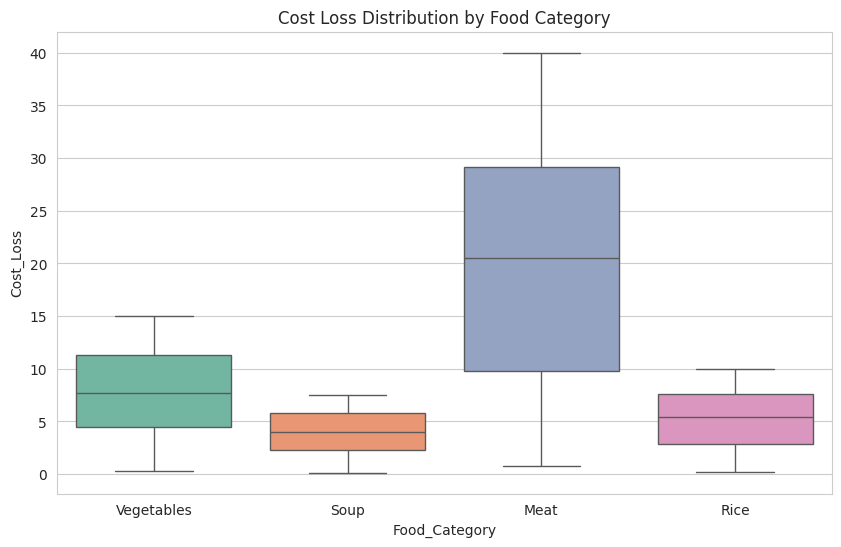

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Food_Category', y='Cost_Loss', palette='Set2')
plt.title('Cost Loss Distribution by Food Category')
plt.show()

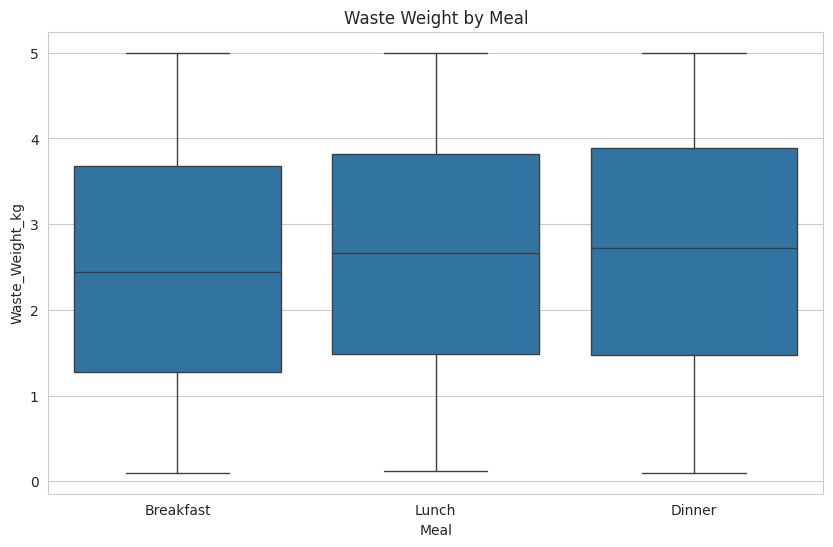

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Meal', y='Waste_Weight_kg')
plt.title('Waste Weight by Meal')
plt.show()

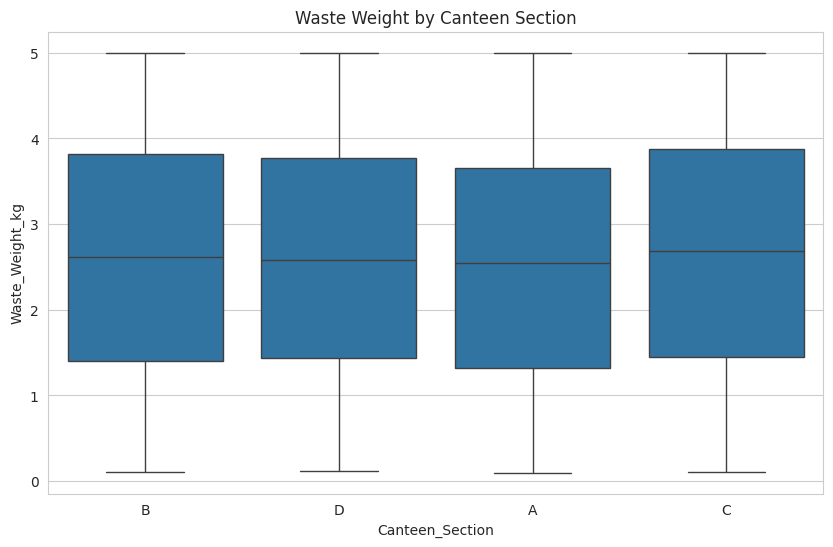

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Canteen_Section', y='Waste_Weight_kg')
plt.title('Waste Weight by Canteen Section')
plt.show()

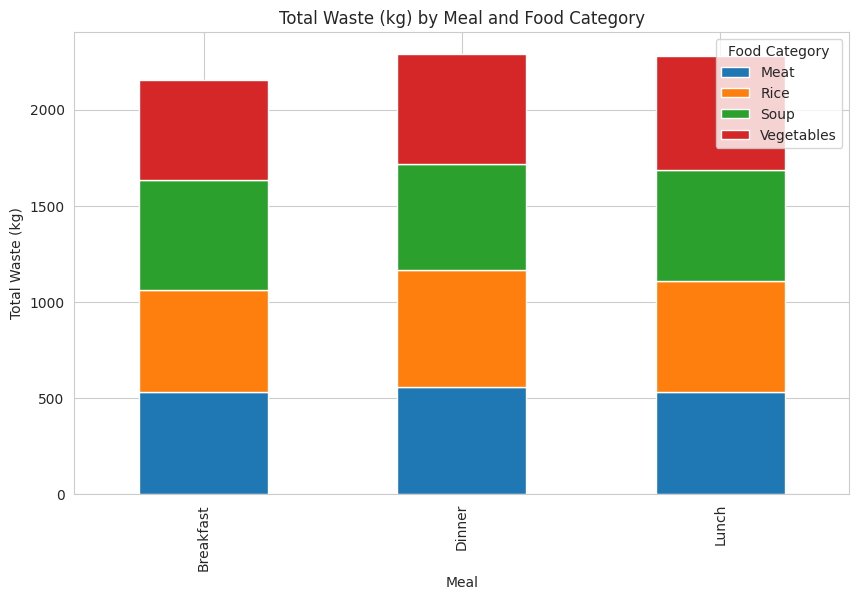

In [31]:
pivot_meal_cat = df.pivot_table(values='Waste_Weight_kg', index='Meal', columns='Food_Category', aggfunc='sum', fill_value=0)
pivot_meal_cat.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Total Waste (kg) by Meal and Food Category')
plt.ylabel('Total Waste (kg)')
plt.legend(title='Food Category')
plt.show()

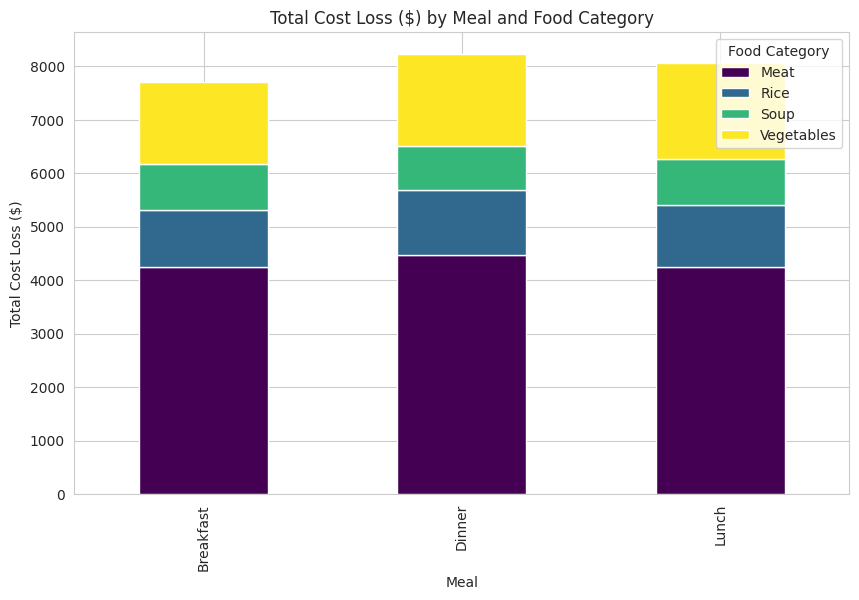

In [32]:
pivot_cost_meal_cat = df.pivot_table(values='Cost_Loss', index='Meal', columns='Food_Category', aggfunc='sum', fill_value=0)
pivot_cost_meal_cat.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
plt.title('Total Cost Loss ($) by Meal and Food Category')
plt.ylabel('Total Cost Loss ($)')
plt.legend(title='Food Category')
plt.show()

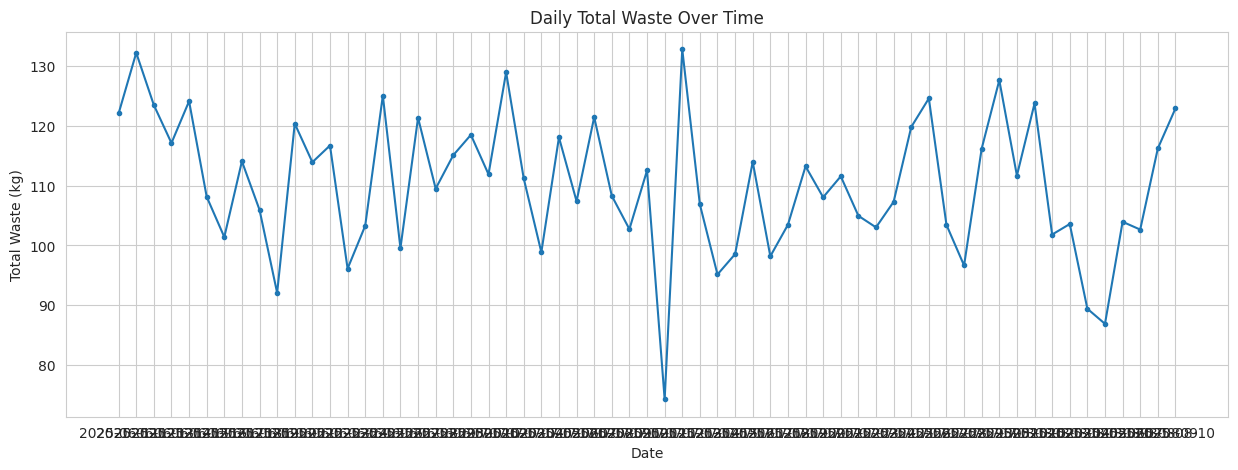

In [33]:
daily_waste = df.groupby('Date')['Waste_Weight_kg'].sum()
plt.figure(figsize=(15,5))
plt.plot(daily_waste.index, daily_waste.values, marker='o', linestyle='-', markersize=3)
plt.title('Daily Total Waste Over Time')
plt.ylabel('Total Waste (kg)')
plt.xlabel('Date')
plt.grid(True)
plt.show()

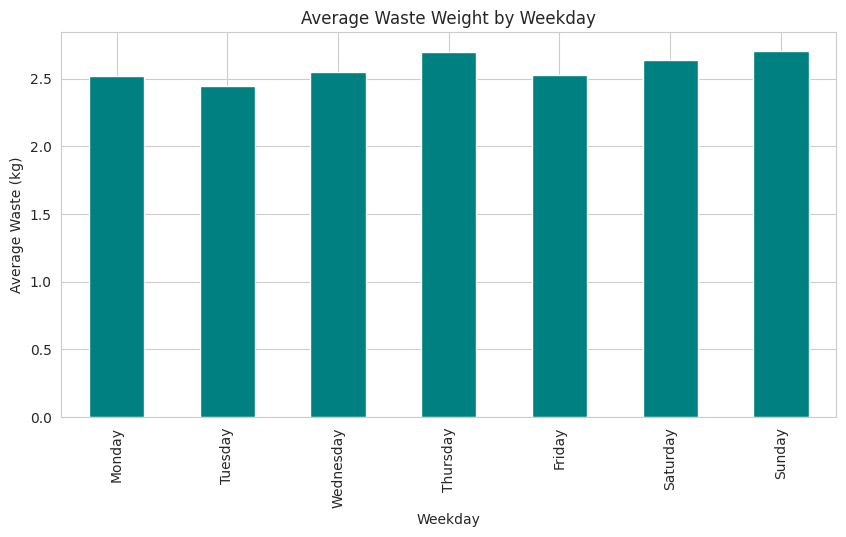

In [34]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Weekday'] = pd.Categorical(df['Weekday'], categories=weekday_order, ordered=True)
weekday_avg = df.groupby('Weekday')['Waste_Weight_kg'].mean()
plt.figure(figsize=(10,5))
weekday_avg.plot(kind='bar', color='teal')
plt.title('Average Waste Weight by Weekday')
plt.ylabel('Average Waste (kg)')
plt.show()

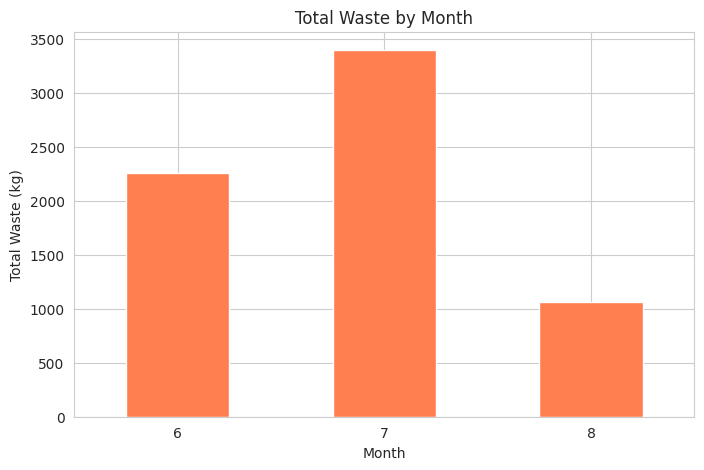

In [35]:
monthly_waste = df.groupby('Month')['Waste_Weight_kg'].sum()
plt.figure(figsize=(8,5))
monthly_waste.plot(kind='bar', color='coral')
plt.title('Total Waste by Month')
plt.xlabel('Month')
plt.ylabel('Total Waste (kg)')
plt.xticks(rotation=0)
plt.show()

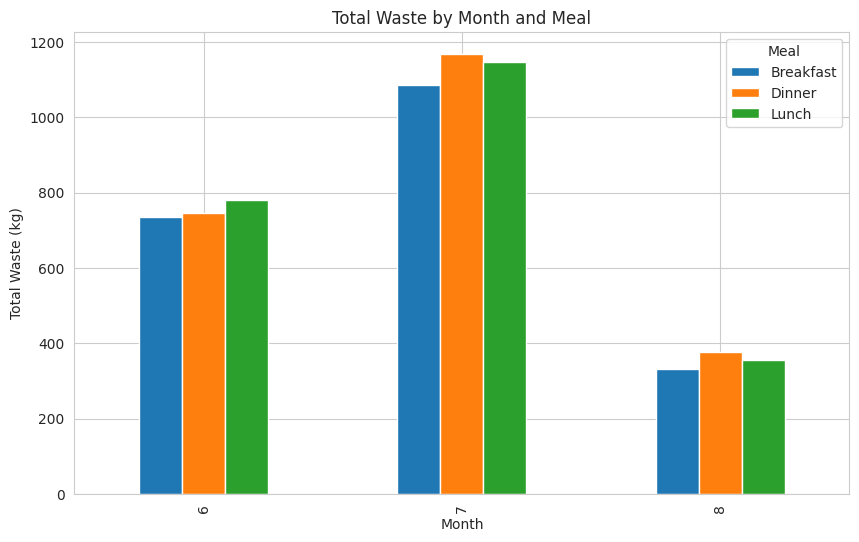

In [36]:
# Pivot: total waste by month and meal
month_meal = df.pivot_table(values='Waste_Weight_kg', index='Month', columns='Meal', aggfunc='sum', fill_value=0)
month_meal.plot(kind='bar', figsize=(10,6))
plt.title('Total Waste by Month and Meal')
plt.ylabel('Total Waste (kg)')
plt.show()

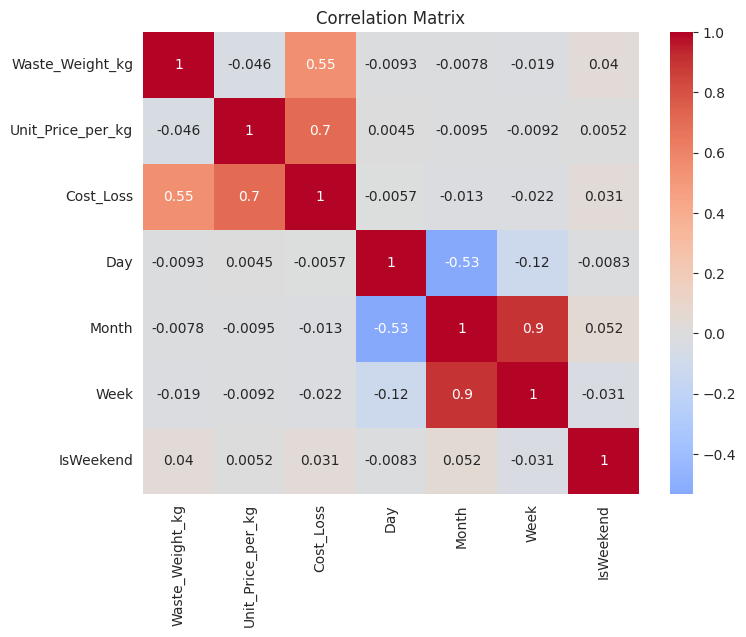

In [37]:
# Select numerical columns for correlation
num_cols = ['Waste_Weight_kg', 'Unit_Price_per_kg', 'Cost_Loss', 'Day', 'Month', 'Week', 'IsWeekend']
corr = df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

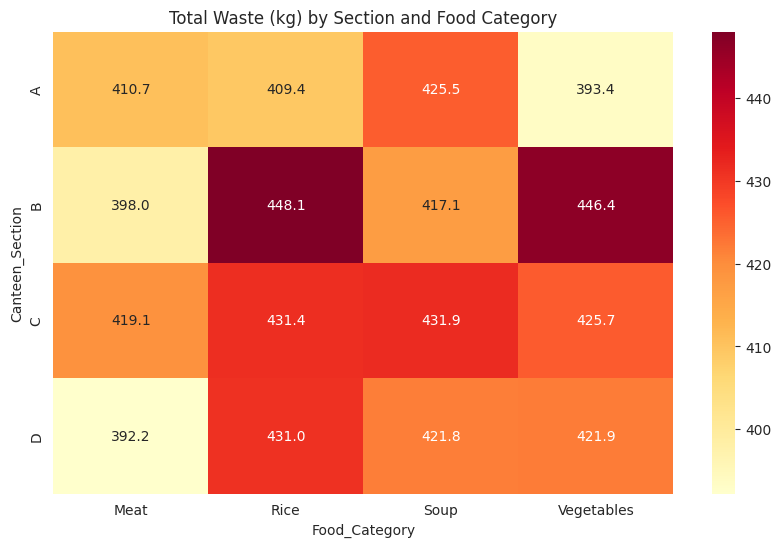

In [38]:
pivot_section_cat = df.pivot_table(values='Waste_Weight_kg', index='Canteen_Section', columns='Food_Category', aggfunc='sum', fill_value=0)
plt.figure(figsize=(10,6))
sns.heatmap(pivot_section_cat, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Total Waste (kg) by Section and Food Category')
plt.show()

In [39]:
top_cost = df.nlargest(10, 'Cost_Loss')[['Date', 'Meal', 'Canteen_Section', 'Food_Category', 'Waste_Weight_kg', 'Cost_Loss']]
top_cost

,Date,Meal,Canteen_Section,Food_Category,Waste_Weight_kg,Cost_Loss
1552,2025-07-17,Breakfast,A,Meat,5.00,40.00
1925,2025-07-25,Dinner,D,Meat,5.00,40.00
963,2025-07-03,Dinner,C,Meat,4.99,39.92
2101,2025-07-30,Breakfast,D,Meat,4.99,39.92
1931,2025-07-26,Breakfast,B,Meat,4.98,39.84
2337,2025-08-04,Lunch,C,Meat,4.98,39.84
572,2025-06-24,Lunch,B,Meat,4.97,39.76
1988,2025-07-27,Lunch,C,Meat,4.97,39.76
1554,2025-07-17,Dinner,A,Meat,4.96,39.68
898,2025-07-01,Breakfast,D,Meat,4.95,39.60


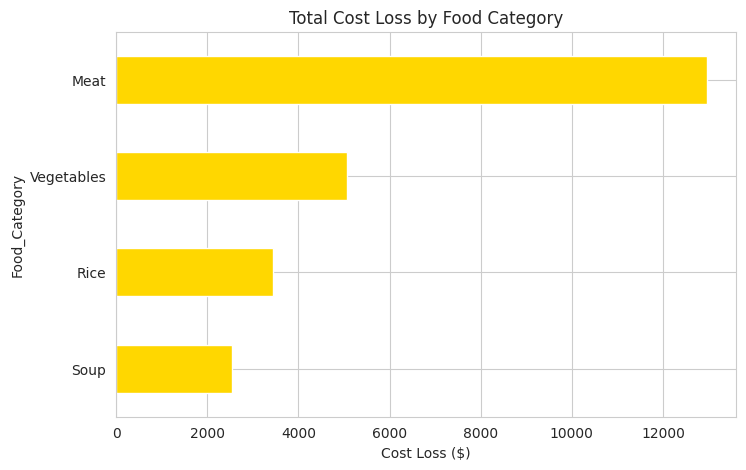

In [40]:
cost_by_cat = df.groupby('Food_Category')['Cost_Loss'].sum().sort_values()
plt.figure(figsize=(8,5))
cost_by_cat.plot(kind='barh', color='gold')
plt.title('Total Cost Loss by Food Category')
plt.xlabel('Cost Loss ($)')
plt.show()

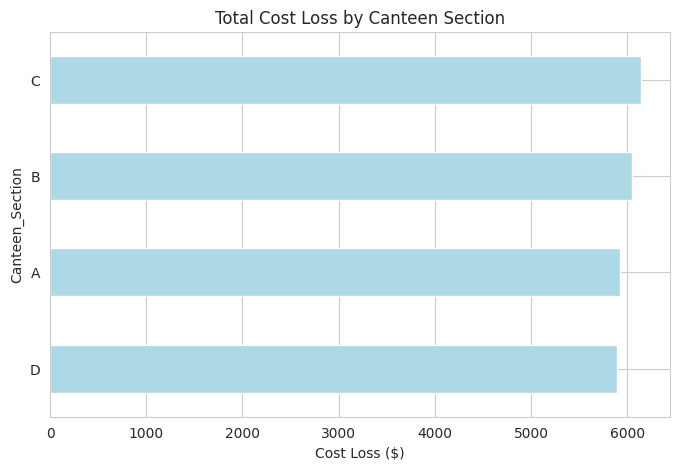

In [41]:
cost_by_section = df.groupby('Canteen_Section')['Cost_Loss'].sum().sort_values()
plt.figure(figsize=(8,5))
cost_by_section.plot(kind='barh', color='lightblue')
plt.title('Total Cost Loss by Canteen Section')
plt.xlabel('Cost Loss ($)')
plt.show()

In [42]:
outlier_waste = df[df['Is_Waste_Outlier']]
outlier_cost = df[df['Is_Cost_Outlier']]
print(f"Waste outliers: {len(outlier_waste)} rows")
print(f"Cost outliers: {len(outlier_cost)} rows")

Waste outliers: 0 rows
Cost outliers: 291 rows


In [43]:
print("Waste outliers by Food Category:")
print(outlier_waste['Food_Category'].value_counts())
print("\nWaste outliers by Meal:")
print(outlier_waste['Meal'].value_counts())

Waste outliers by Food Category:
Series([], Name: count, dtype: int64)

Waste outliers by Meal:
Series([], Name: count, dtype: int64)


In [44]:
print("Cost outliers by Food Category:")
print(outlier_cost['Food_Category'].value_counts())
print("\nCost outliers by Meal:")
print(outlier_cost['Meal'].value_counts())

Cost outliers by Food Category:
Food_Category
Meat    291
Name: count, dtype: int64

Cost outliers by Meal:
Meal
Dinner       102
Lunch         96
Breakfast     93
Name: count, dtype: int64


In [45]:
df['Cost_per_kg'] = df['Cost_Loss'] / df['Waste_Weight_kg']  # should equal Unit_Price_per_kg
# Confirm
print(df[['Unit_Price_per_kg', 'Cost_per_kg']].head(10))

   Unit_Price_per_kg  Cost_per_kg
0                3.0          3.0
1                1.5          1.5
2                1.5          1.5
3                1.5          1.5
4                8.0          8.0
5                8.0          8.0
6                3.0          3.0
7                8.0          8.0
8                2.0          2.0
9                2.0          2.0


In [47]:
!jupyter nbconvert --ClearOutputPreprocessor.enabled=True --execute EDA.ipynb --to html

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/traitlets/traitlets.py", line 653, in get
    value = obj._trait_values[self.name]
            ~~~~~~~~~~~~~~~~~^^^^^^^^^^^
KeyError: 'template_paths'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/traitlets/traitlets.py", line 653, in get
    value = obj._trait_values[self.name]
            ~~~~~~~~~~~~~~~~~^^^^^^^^^^^
KeyError: 'extra_template_basedirs'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 4, in <module>
    from nbconvert.nbconvertapp import main
  File "/usr/local/lib/python3.12/dist-packages/nbconvert/nbconvertapp.py", line 193, in <module>
    class NbConve